참고
- `@trace_function()` 은 제가 자체적으로 작성한 데코레이터입니다. 경로는 `utils/util.py` 입니다.

- 랭그래프를 실행하기 위한 라이브러리 목록은 `modules/base.py` 에 있습니다.

In [2]:
from modules.base import *

#### 기본 그래프 만들기
- 노드는 특정 기능을 수행하는 함수

- 에지는 노드를 연결하는 역할

---

##### 1. state 구조 정의

- TypeDict 사용 (향후 뒤에서는 사전정의된 구조방식 사용가능)

- 지정한 key 값만 받을 수 있음. (아래 예시에 따르면 graph_state 라는 key값만 받을 수 있음.)

In [3]:
class StateClass(TypedDict): # state 구조 정의
    graph_state: str # graph_state 라는 key값만 받을 수 있음.

##### 2. 그래프 생성 및 테스트

- add_conditional_edges 사용시 주의할점

- `Literal["node_2", "node_3"]` 처럼 출력형태 선택지를 명시하지않으면, 그림이 이쁘지 않게 나옴

In [6]:
@trace_function()
def node_1(state):
    return {"graph_state": state['graph_state'] +" I am"}

@trace_function()
def node_2(state):
    return {"graph_state": state['graph_state'] +" happy!"}

@trace_function()
def node_3(state):
    return {"graph_state": state['graph_state'] +" sad!"}

출력 노드 명시

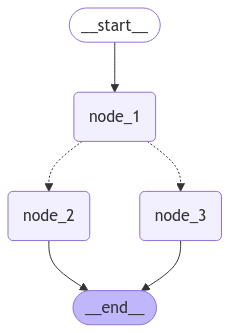

In [7]:
@trace_function()
def decide_mood(state) -> Literal["node_2", "node_3"]: 
    _ = state['graph_state'] 
    if random.random() < 0.5:
        return "node_2"
    return "node_3"

builder = StateGraph(StateClass)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

출력노드 명시하지 않음

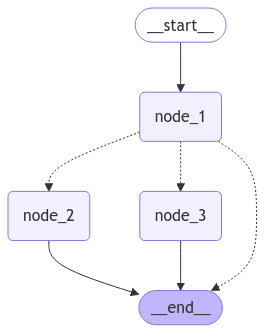

In [8]:
@trace_function()
def decide_mood(state): 
    _ = state['graph_state'] 
    if random.random() < 0.5:
        return "node_2"
    return "node_3"

builder = StateGraph(StateClass)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
graph.invoke({"graph_state":"Hi, this is Lance."})


🚀 Passing Through [node_1] ..

🚀 Passing Through [decide_mood] ..

🚀 Passing Through [node_2] ..


{'graph_state': 'Hi, this is Lance. I am happy!'}